# Task 1: Data Preparation


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In the above i import pandas library as pd and the matplotlib.pyplot module as plt 

In [2]:
weather_data=pd.read_csv(
    "F:/Practical Data Science/Assignment 1/Daily Rainfall Climate Data/Data.csv"
)

In the above code, I used read_csv() from the pandas library to retrieve data from the provided CSV file.

In [3]:
weather_data.shape

(3865, 4)

In [4]:
weather_data = weather_data.drop_duplicates(keep='first')

The code df.drop_duplicates(keep='first') is a pandas DataFrame method used to remove duplicate rows from a DataFrame. 
The parameter keep='first' specifies that it will keep the first occurrence of each duplicated row and remove the subsequent duplicates.

In [5]:
weather_data.dtypes

Year                               int64
Month                             object
Day                               object
Rainfall amount (millimetres)    float64
dtype: object

'.dtypes' is used to to display the data type of each column in the DataFrame.

I have evaluated every coloumn in the dataset to find error or any misleading values.

In [6]:
weather_data['Year'].value_counts()

Year
2016    366
2020    366
2014    365
2015    365
2018    365
2019    365
2021    365
2022    365
2023    365
2017    364
2013    213
2027      1
Name: count, dtype: int64

'.value_counts()' is used to count the frequency of unique values of the column.

In [7]:
weather_data['Year'].isnull().values.any()

False

'.isnull().values.any()' checks if there are any null values present in the data.it print 'True' when there are null else 'False'.

In [8]:
weather_data['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2027, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

'.unique()' is used to extract unique elements without duplicates.

In [9]:
weather_data['Year'].replace(2027, 2017, inplace=True)

'.replace' is used to replace occurrences of a specified substring with another substring within a string.

In [10]:
weather_data['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [11]:
weather_data['Month'].value_counts()

Month
7        341
8        341
10       341
12       341
9        330
11       330
6        329
3        310
5        310
1        308
4        299
2        282
April      1
Jan        1
Name: count, dtype: int64

In [12]:
weather_data['Month'].isnull().values.any()

True

In [13]:
weather_data['Month'].unique()

array(['6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5',
       'April', 'Jan', nan], dtype=object)

In [14]:
weather_data['Month'].replace('April', 4, inplace=True)
weather_data['Month'].replace('Jan', 1, inplace=True)


weather_data['Month'].fillna(1, inplace=True)  # removing nan values

'.replace()' is used to create a new string where occurrences of a specified substring within the original string are replaced with another substring.

'.fillna()' is used to replace missing (NaN) values in a DataFrame or Series with specified values.

In [15]:
weather_data['Month'].unique()

array(['6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', 4,
       1], dtype=object)

In [16]:
weather_data['Month'] = weather_data['Month'].astype(int)

'.astype()' is used to change the data type of a NumPy array or pandas DataFrame to the specified data type.

In [17]:
weather_data['Month'].unique()


array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [18]:
weather_data['Month'].isnull().values.any()

False

Checking the unique values and null values shows that the errors and misleading values in 'Month' column are successfully handled. 

In [19]:
weather_data['Day'].value_counts()

Day
2       127
16      127
28      127
27      127
26      127
25      127
24      127
23      127
22      127
21      127
3       127
18      127
17      127
19      127
15      127
8       127
5       127
14      127
7       127
6       127
11      127
12      127
13      127
10      126
9       126
20      126
4       126
1       126
29      119
30      117
31       74
48        1
nine      1
200       1
Name: count, dtype: int64

In [20]:
weather_data['Day'].isnull().values.any()

True

In [21]:
weather_data['Day'].unique()

array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '1', '31', '48', nan, 'nine',
       '200'], dtype=object)

In [22]:
weather_data['Day'].replace('nine', 9, inplace=True)

weather_data['Day'].fillna(4, inplace=True)

weather_data['Day'] = weather_data['Day'].astype(int)

weather_data['Day'].replace(48, 10, inplace=True)

weather_data['Day'].replace(200, 20, inplace=True)


In [23]:
weather_data['Day'].isnull().values.any()

False

In [24]:
weather_data['Day'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1, 31])

Checking the unique values and null values shows that the errors and misleading values in 'Day' column are successfully handled. 

In [25]:
weather_data['Rainfall amount (millimetres)'].value_counts()

Rainfall amount (millimetres)
 0.0         2312
 0.2          271
 0.4          128
 0.6           95
 0.8           75
             ... 
 16.6           1
 41.2           1
 100000.0       1
-10.0           1
 38.4           1
Name: count, Length: 135, dtype: int64

In [26]:
weather_data['Rainfall amount (millimetres)'].isnull().values.any()

True

After careful observation if the dataset , we can conclude that some values can't be logically correct like -10.0 should not be rainfall value, 10000.0 should not be logically correct .

Finding the Year and month of the incorrect value will give tell us of which part of mean we have to take.

In [27]:
# Filter the dataframe to retrieve rows where 'Rainfall amount (millimetres)' is -10
rows_with_value = weather_data[weather_data['Rainfall amount (millimetres)'] == -10]

# Print the values of other columns for those rows
print("Rows with Rainfall amount (millimetres) = -10:")
print(rows_with_value)

Rows with Rainfall amount (millimetres) = -10:
      Year  Month  Day  Rainfall amount (millimetres)
2158  2019      4   30                          -10.0


Filtering the dataset for a specific year and month allows for a focused analysis on a particular subset of the data.

I have filtered the data to calculate the mean of the particular Month in which the value -10 is included.so, that the calculated mean will be of that particular Month.

In [28]:
filtered_data = weather_data[(weather_data['Year'] == 2019) & (weather_data['Month'] == 4) & (weather_data['Rainfall amount (millimetres)'] > 0)]

mean_value = filtered_data['Rainfall amount (millimetres)'].mean()

weather_data.loc[weather_data['Rainfall amount (millimetres)'] == -10, 'Rainfall amount (millimetres)'] = mean_value


Same process with 100000.0

In [29]:
# Filter the dataframe to retrieve rows where 'Rainfall amount (millimetres)' is 100000.0
rows_with_value = weather_data[weather_data['Rainfall amount (millimetres)'] == 100000.0]

# Print the values of other columns for those rows
print("Rows with Rainfall amount (millimetres) = 100000.0:")
print(rows_with_value)

Rows with Rainfall amount (millimetres) = 100000.0:
      Year  Month  Day  Rainfall amount (millimetres)
2093  2019      2   24                       100000.0


In [30]:
filtered_data = weather_data[(weather_data['Year'] == 2019) & (weather_data['Month'] == 2) & (weather_data['Rainfall amount (millimetres)'] != 100000.0)]

mean_value = filtered_data['Rainfall amount (millimetres)'].mean().round(1)

weather_data.loc[weather_data['Rainfall amount (millimetres)'] ==  100000.0, 'Rainfall amount (millimetres)'] = mean_value


In [31]:
weather_data['Rainfall amount (millimetres)'].isnull().values.any()

True

In [32]:
mean_rainfall =weather_data['Rainfall amount (millimetres)'].mean()
weather_data['Rainfall amount (millimetres)'].fillna(mean_rainfall, inplace=True)

In [33]:
weather_data['Rainfall amount (millimetres)'].isnull().values.any()

False

'.index' gives the index labels of the selected rows.

In [34]:
weather_data.to_csv('cleaned_version.csv', index=False)

# Task 2 Data Exploratrion

## Task 2.1

In [35]:
# Code goes after this line by adding cells
import pandas as pd
import matplotlib.pyplot as plt

cleaned_data=pd.read_csv("F:/Practical Data Science/Assignment 1/cleaned_version.csv")

filtered_data = cleaned_data[cleaned_data['Year'] == 2014]

pivot_df = cleaned_data.pivot_table(index='Day', columns='Month', values='Rainfall amount (millimetres)', aggfunc='max')
pivot_df

Month    1     2     3     4     5     6     7     8     9     10    11    12
Day                                                                          
1       0.0   9.2  15.8   4.6   9.8   8.2   6.4  18.0   2.2  21.8   6.0   4.6
2       6.4  14.8   6.0  23.0   3.6  11.6   1.6  14.4  10.8  11.6   4.2  20.6
3      12.6  11.2   0.2  15.8   3.0  15.4   6.6   6.4   4.4   9.2  12.4  43.8
4       4.2   6.6   0.2  35.2  30.8   6.2   7.8  12.2  38.2  22.8  45.4  10.4
5      11.2   1.2  54.6   4.4   2.6   4.8   4.6   5.8   9.6  12.8  12.2   9.2
6       8.2  32.4   7.0  12.8  14.8   6.4  22.6   3.8   4.8   7.4  17.6   2.6
7       1.4  11.0   3.2   6.8  22.6  13.0   3.8   4.2   3.6  15.2  35.8  14.8
8      24.8   0.4   2.0  11.2   5.8  10.6   5.2  15.2   4.0  19.8   6.8  25.2
9       1.2   0.2   5.4  13.4   1.6   6.2   5.8   6.4   5.6   5.8   8.8   6.6
10      5.2   4.8   0.6  25.4  12.0  12.0   5.0   4.2   9.4   2.2  10.0  12.4
11     15.6   0.0   8.4  15.4  18.6   3.0   6.4  10.4   2.4   3.2  10.0   1.0
12      1.0   4.6   1.6  10.0   8.4   9.4   6.8   8.8   1.6  10.0   4.0  17.4
13      7.0   2.8   2.2   4.4   6.8   9.6  28.4   3.4  11.8  21.6  18.6  16.2
14     15.8  19.6  17.2   1.6   4.4   9.2  17.0   0.8  20.6  22.6  13.6  16.6
15      6.0   5.4   2.2  12.2   7.4   4.6   4.4   2.8  15.8   1.4  14.2  41.2
16     19.6   5.8   5.6  38.4   4.0   5.0   2.0   3.2  21.4  26.4  36.6   3.8
17      0.2   4.8   2.6   2.0   3.2  15.6   2.4   3.8  25.4   9.8   4.2   2.0
18      6.0   1.2  13.4  13.4   0.8   8.6   4.2   5.4   9.6   2.0   0.0   7.6
19      4.6  38.0   5.8  13.2   2.6  10.0   6.6  12.4  10.8   2.6  24.8   4.0
20     22.6  10.4   0.2   9.0  15.6   3.6  13.4   9.4   1.8   5.0  16.0  20.6
21     44.0   2.8   4.4  10.4  12.4   3.8  10.8   1.2   8.0   5.6  24.2   6.0
22      1.6   1.6   9.2  21.6  11.4   1.2   7.8   5.6   4.6  18.6   8.6  13.2
23     22.8   0.2  13.8   4.8   6.2   2.8   3.0  25.6   2.0  15.4  30.2   6.0
24      5.2   3.2   2.0   0.4   3.0  13.8   8.0  10.4   1.6  32.2   7.0   1.0
25      5.4   3.6  13.0  21.6   1.6   7.0   6.2   4.8  11.6  11.4  12.6  14.2
26     10.6   4.0   5.2  20.0  12.4   5.6   4.8   1.2  30.2   8.2   3.8  30.6
27      7.0   2.6   4.6  15.4   8.2   5.4   6.8   7.8  12.6  22.4   7.2   5.2
28      3.6   0.2   8.0   1.6   6.8   0.2   7.2  17.4   4.2  15.8   1.8   3.2
29     38.6   0.0   5.8   5.2   5.4   3.6   5.2   6.2   1.8   5.0   9.6   1.2
30     43.2   NaN   8.2  31.4   5.8   6.4   2.4  10.6   3.4   4.4   8.0  20.4
31     10.6   NaN   2.8   NaN  10.2   NaN   3.0   2.8   NaN   6.0   NaN   2.4

In [36]:
highest_daily_rainfall = pivot_df.max()

print("Highest daily rainfall in each month:")
print(highest_daily_rainfall)

Highest daily rainfall in each month:
Month
1     44.0
2     38.0
3     54.6
4     38.4
5     30.8
6     15.6
7     28.4
8     25.6
9     38.2
10    32.2
11    45.4
12    43.8
dtype: float64


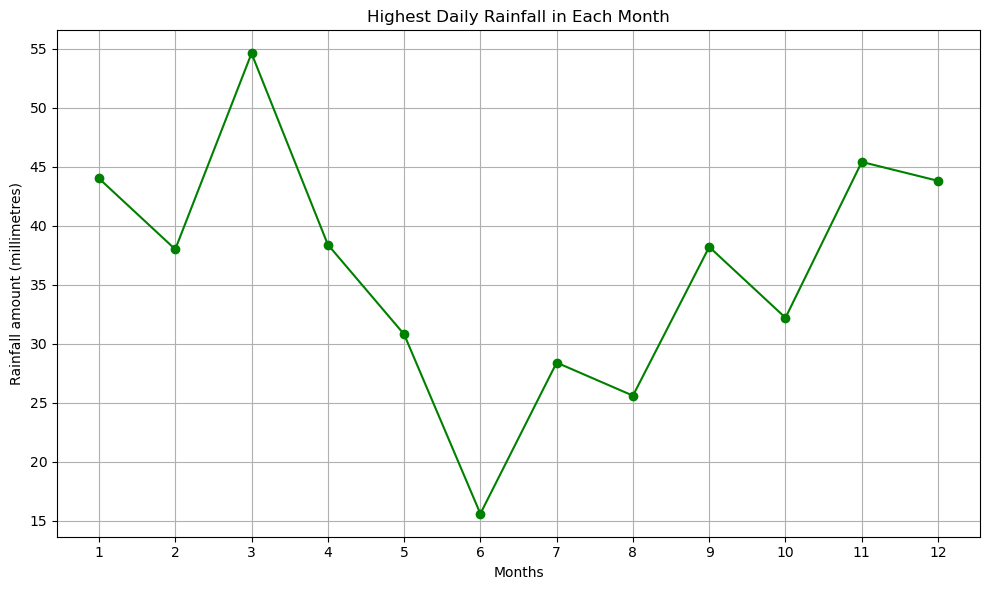

In [37]:
# Creating a line plot
plt.figure(figsize=(10, 6))
plt.plot(highest_daily_rainfall.index, highest_daily_rainfall.values, marker='o', color='green', linestyle='-')

#marker='o' sets the marker style for each data point on the line plot. Here, 'o' represents circular markers. 
#linestyle='-' sets the style of the line connecting the data points. Here, '-' represents a solid line.

# Setting the title and labels
plt.title('Highest Daily Rainfall in Each Month')
plt.xlabel('Months')
plt.ylabel('Rainfall amount (millimetres)')
plt.xticks(ticks=highest_daily_rainfall.index, labels=highest_daily_rainfall.index) # this line is used to label for the ticks on the x-axis of the plot.


# Show the plot
plt.grid(True)
#plt.grid(True) adds grid lines to the plot, making it easier to understand the data
plt.tight_layout()
#plt.tight_layout() adjusts the subplot parameters to give specified padding. It helps prevent labels or titles from being clipped or overlapping with the plot.
plt.show()

## Task 2.2 

In [38]:
# Code goes after this line by adding cells
import pandas as pd
import matplotlib.pyplot as plt

cleaned_data=pd.read_csv("F:/Practical Data Science/Assignment 1/cleaned_version.csv")

filtered_data = cleaned_data[(cleaned_data['Year'] >= 2015) & (cleaned_data['Year'] <= 2017)]

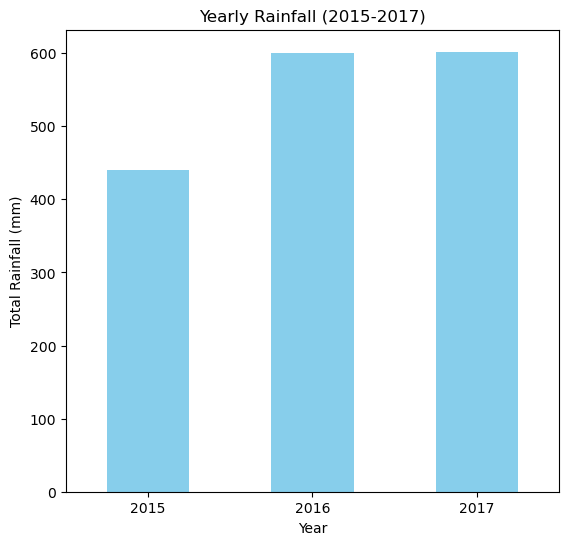

In [39]:
# Yearly analysis
yearly_rainfall = filtered_data.groupby('Year')['Rainfall amount (millimetres)'].sum()

# Plotting
plt.figure(figsize=(14, 6))


# Yearly analysis plot
plt.subplot(1, 2, 1)
yearly_rainfall.plot(kind='bar', color='skyblue')
plt.title('Yearly Rainfall (2015-2017)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=0) #rotates the x-axis labels of the plot by 45 degrees for better readability.

plt.show()

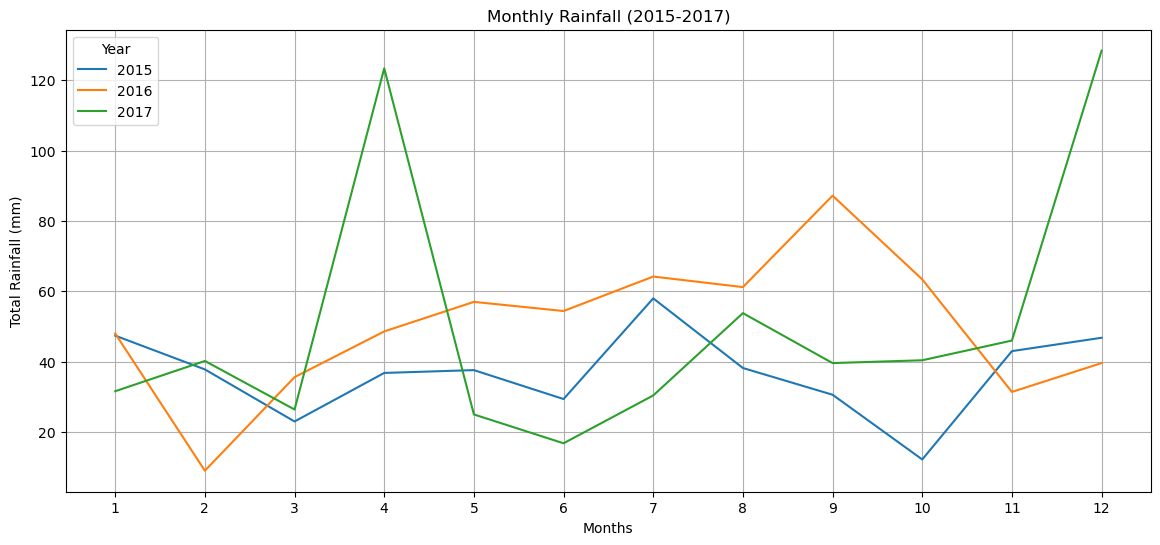

In [40]:
# Monthly analysis
monthly_rainfall = filtered_data.groupby(['Year', 'Month'])['Rainfall amount (millimetres)'].sum().unstack()
#.unstack(): Reshapes the data by converting the innermost index level ('Month') into columns, resulting in a DataFrame where each row represents a year and each column represents a month.


# Plot monthly rainfall
plt.figure(figsize=(14, 6))
for year in monthly_rainfall.index:  #This loop iterates over the index of the monthly_rainfall DataFrame, which consists of the years for which rainfall data is available.
    plt.plot(monthly_rainfall.columns, monthly_rainfall.loc[year], label=year)  #it Plots the total monthly rainfall for each year using the columns (representing months) and the corresponding rainfall values for the current year, with the year as the label for the line in the plot.



plt.title('Monthly Rainfall (2015-2017)')
plt.xlabel('Months')
plt.ylabel('Total Rainfall (mm)')
plt.legend(title='Year', loc='upper left') #This line adds a legend to the plot with the title 'Year' and locates it in the upper-left corner. The legend helps identify which line corresponds to which year.
plt.xticks(range(1, 13)) #This line sets the x-axis ticks to range from 1 to 12, representing the months of the year.
plt.grid(True) ##plt.grid(True) adds grid lines to the plot, making it easier to understand the data

plt.show()

## Task 2.3 

In [41]:
# Code goes after this line by adding cells
import pandas as pd
import matplotlib.pyplot as plt


cleaned_data=pd.read_csv("F:/Practical Data Science/Assignment 1/cleaned_version.csv")

# Aggregating the data by year and sum the rainfall amounts
yearly_rainfall = cleaned_data.groupby('Year')['Rainfall amount (millimetres)'].sum().reset_index()

# Sorting the DataFrame by rainfall amount in descending order to find top 3 highest
sorted_rainfall_desc = yearly_rainfall.sort_values(by='Rainfall amount (millimetres)', ascending=False)

# Top 3 years with the highest rainfall amount
top_3_highest = sorted_rainfall_desc.head(3)

# Sorting the DataFrame by rainfall amount in ascending order, and then by year
sorted_rainfall_asc = yearly_rainfall.sort_values(by=['Rainfall amount (millimetres)', 'Year'], ascending=[True, True])

# Top 3 years with the lowest rainfall amount
top_3_lowest = sorted_rainfall_asc.head(3)

print("Top 3 years with the highest rainfall amount:")
print(top_3_highest)

print("\nTop 3 years with the lowest rainfall amount:")
print(top_3_lowest)

Top 3 years with the highest rainfall amount:
   Year  Rainfall amount (millimetres)
7  2020                     786.800000
9  2022                     699.400000
8  2021                     685.754352

Top 3 years with the lowest rainfall amount:
   Year  Rainfall amount (millimetres)
6  2019                          376.3
0  2013                          380.2
1  2014                          432.0


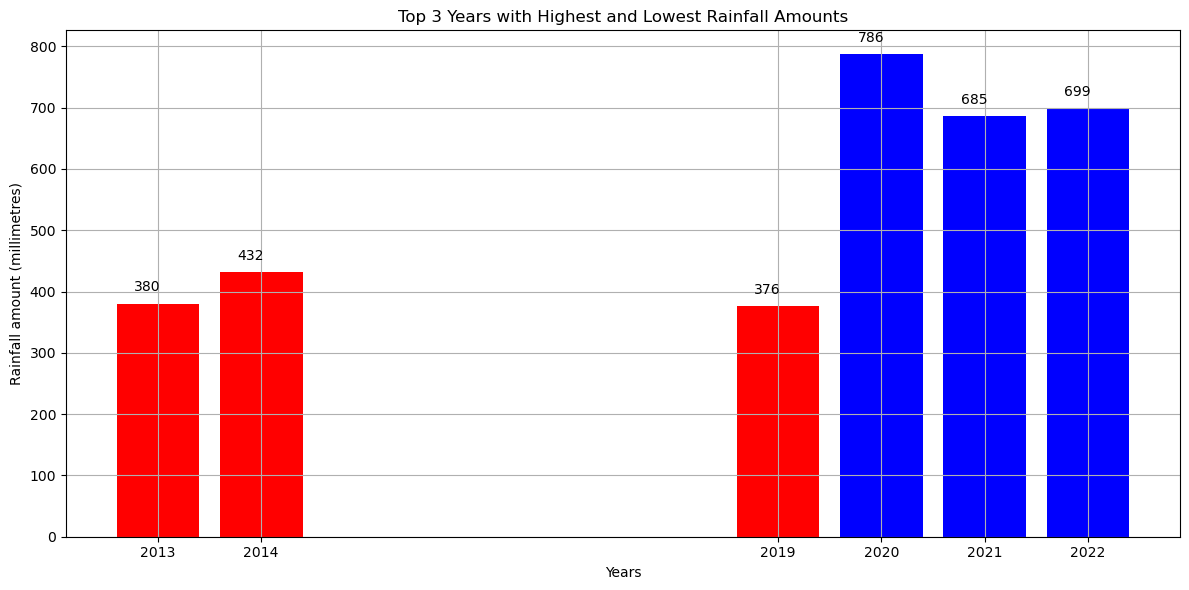

In [42]:
# Combine the top 3 highest and lowest DataFrames
combined_df = pd.concat([top_3_highest, top_3_lowest]) 
#'.concat' concatenates two or more DataFrames along a specified axis. Here, it's used to combine top_3_highest and top_3_lowest DataFrames 


colors = ['blue'] * 3 + ['red'] * 3 #This line creates a list called colors containing 3 blue color values followed by 3 red color values.
#Defines colors for the bar plot, with blue for the top 3 highest and red for the top 3 lowest.


# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
bars = plt.bar(combined_df['Year'], combined_df['Rainfall amount (millimetres)'], color=colors)

# Adding text labels for each year
for bar in bars: 
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 20, str(int(bar.get_height())), 
             ha='center', color='black')   #ha='center' parameter specifies horizontal alignment of the text to be centered

#In above code the loop iterates over each bar in the bar plot and adds a text label above each bar indicating the height of the bar (rainfall amount) as an integer.
# get_x() method retrieves the x-coordinate of the left edge of the bar,
# get_width() method retrieves the width of the bar
# get_height() method retrieves the height of the bar


# Set the title and labels
plt.title('Top 3 Years with Highest and Lowest Rainfall Amounts')
plt.xlabel('Years')
plt.ylabel('Rainfall amount (millimetres)')

# Show the plot
plt.xticks(combined_df['Year'])  #Sets x-axis tick labels from the 'Year' column of the combined DataFrame .
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 2.4

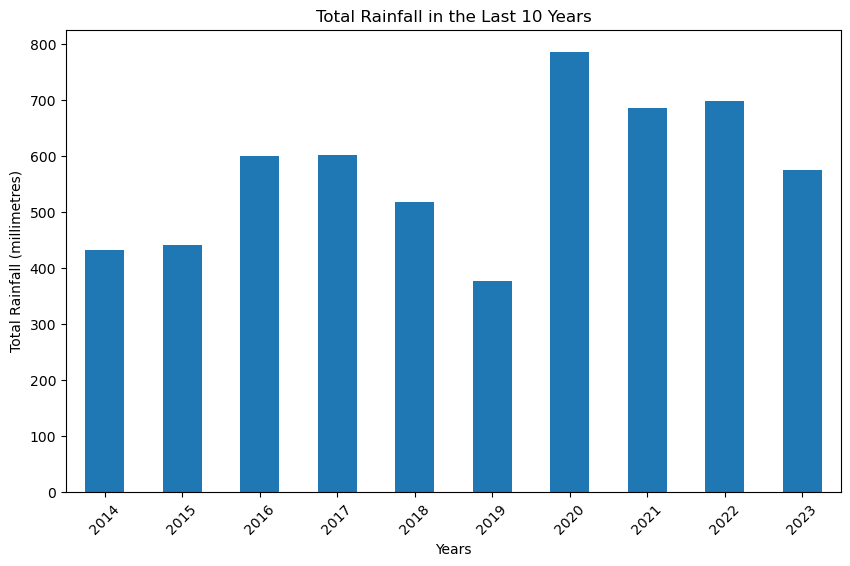

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total rainfall for each year
total_rainfall_per_year = cleaned_data.groupby('Year')['Rainfall amount (millimetres)'].sum()

# Plot the changes in rainfall over the last 10 years
total_rainfall_per_year.tail(10).plot(kind='bar', figsize=(10, 6))
#'.tail()'  is used to get the last 10 rows of the total_rainfall_per_year Series, which effectively gives us the total rainfall for the last 10 years.
plt.title('Total Rainfall in the Last 10 Years')
plt.xlabel('Years')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(rotation=45) # used for better readability of the labels on x-axis
plt.show()